# E23CSEU0055 - Arihant Gupta - EB02 - Lab_06 - Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

Load the dataset and set the datetime column as index.

In [2]:
df = pd.read_csv("ep.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
print(df)

          DATE  IPG2211A2N
0   1985-01-01     72.5052
1   1985-02-01     70.6720
2   1985-03-01     62.4502
3   1985-04-01     57.4714
4   1985-05-01     55.3151
..         ...         ...
392 2017-09-01     98.6154
393 2017-10-01     93.6137
394 2017-11-01     97.3359
395 2017-12-01    114.7212
396 2018-01-01    129.4048

[397 rows x 2 columns]


In [3]:
df.set_index("DATE", inplace=True)
print(df)

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]


Plot the raw time series and comment on its trend, seasonality, and potential stationarity

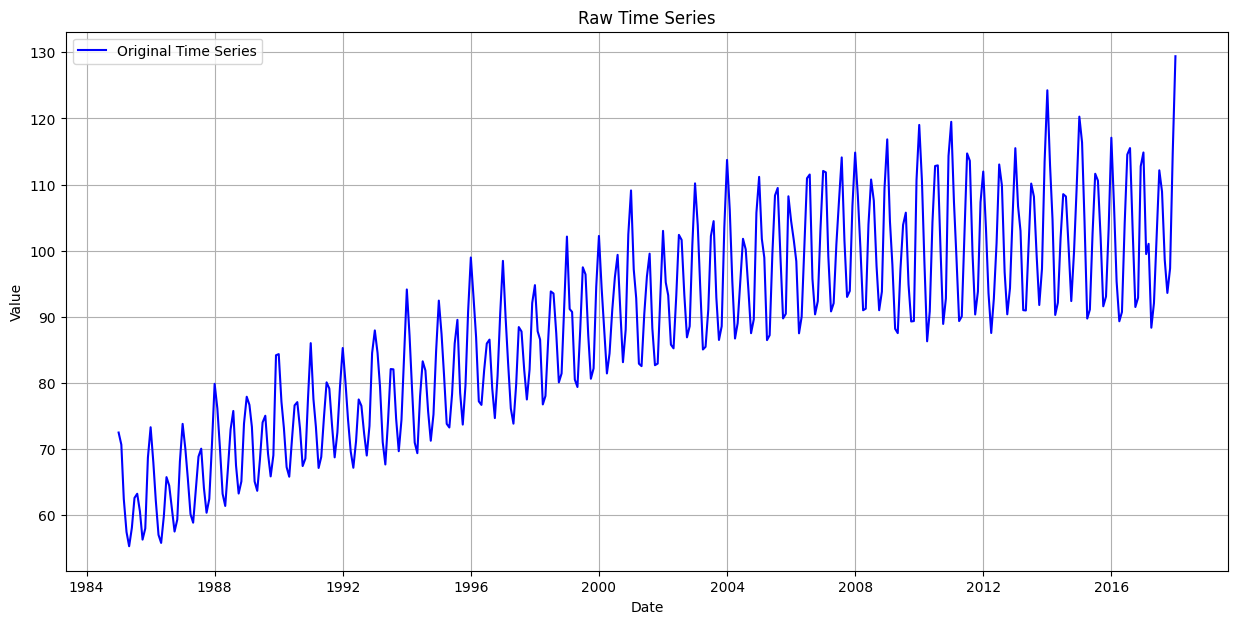

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df["IPG2211A2N"], label='Original Time Series', color='blue')
plt.title('Raw Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Apply differencing if required to achieve stationarity (based on ADF test)

In [5]:
df['seasonal_diff'] = df["IPG2211A2N"].diff(periods=12)
df['final_stationary'] = df['seasonal_diff'].diff()
stationary_series = df['final_stationary'].dropna()

Simulate an AR(1) process:
Xt=φXt−1+εt where εt is white noise

c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


DATE
1986-02-01    0.031747
1986-03-01    0.765609
1986-04-01   -0.474259
1986-05-01    0.082269
1986-06-01   -0.157146
                ...   
2017-09-01    0.914412
2017-10-01   -0.469961
2017-11-01   -1.270912
2017-12-01   -0.445446
2018-01-01    0.558742
Length: 384, dtype: float64


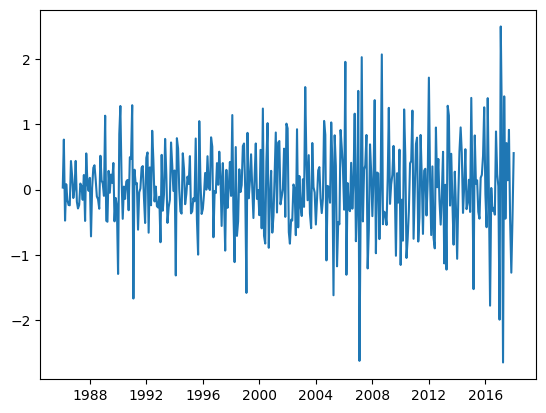

In [6]:
ar1 = ARIMA(stationary_series, order=(1, 0, 0)).fit(method='yule_walker')
print(ar1.fittedvalues)
plt.plot(ar1.fittedvalues)
plt.show()

Simulate an AR(2) process and plot both AR(1) and AR(2) series

DATE
1986-02-01    0.027189
1986-03-01    0.760111
1986-04-01    0.446835
1986-05-01   -0.657002
1986-06-01   -0.147942
                ...   
2017-09-01    1.343740
2017-10-01    0.672318
2017-11-01   -2.421011
2017-12-01   -2.524485
2018-01-01    0.008937
Length: 384, dtype: float64


c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


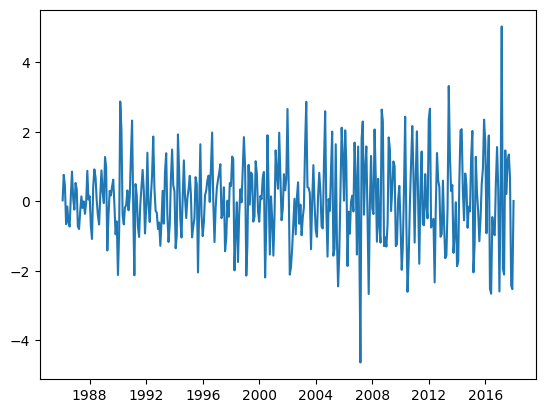

In [7]:
ar2 = ARIMA(stationary_series, order=(2, 0, 0)).fit(method='yule_walker')
print(ar2.fittedvalues)
plt.plot(ar2.fittedvalues)
plt.show()

Plot the ACF and PACF to determine a suitable AR order (p).


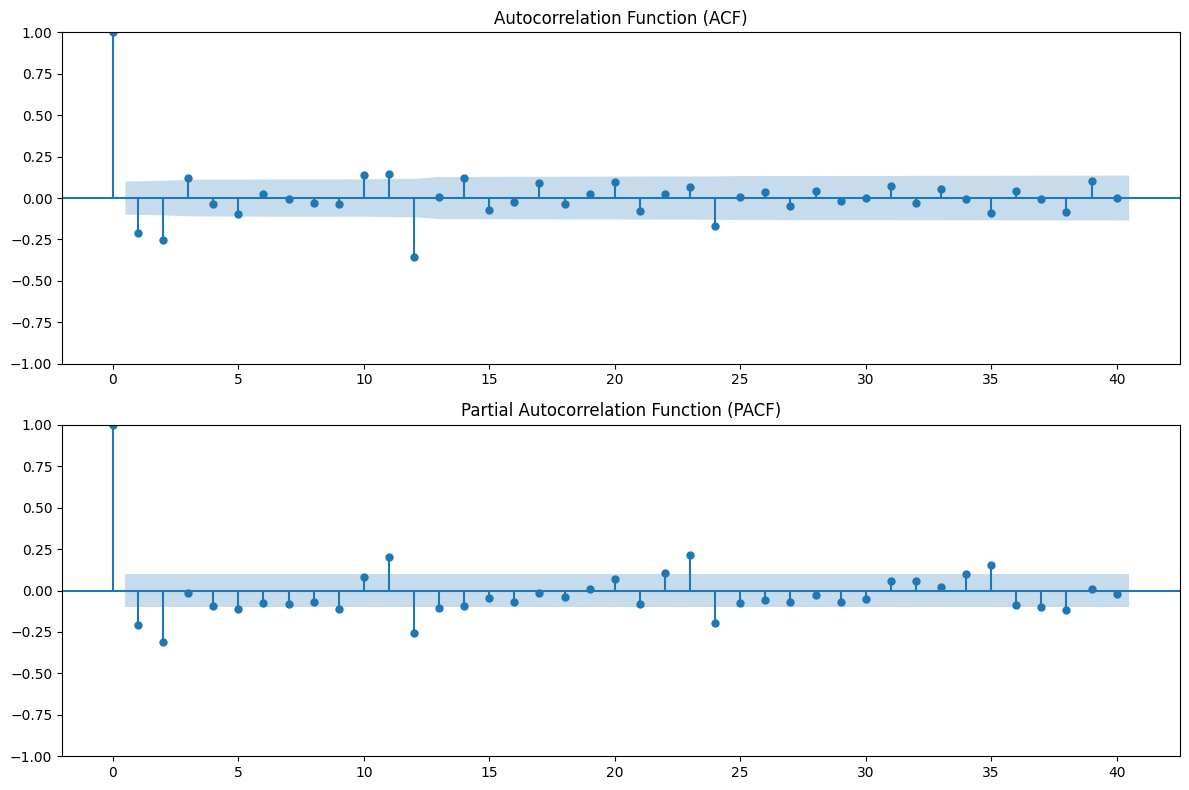

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(stationary_series, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')
plot_pacf(stationary_series, ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()
plt.close()

Fit an AR(p) model using statsmodels.tsa.ar_model.AutoReg.


In [9]:
p = 2
model = AutoReg(stationary_series, lags=p)
results = model.fit()
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:       final_stationary   No. Observations:                  384
Model:                     AutoReg(2)   Log Likelihood                -970.279
Method:               Conditional MLE   S.D. of innovations              3.068
Date:                Mon, 01 Sep 2025   AIC                           1948.558
Time:                        23:34:28   BIC                           1964.340
Sample:                    04-01-1986   HQIC                          1954.819
                         - 01-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0452      0.157      0.288      0.773      -0.262       0.353
final_stationary.L1    -0.2826      0.049     -5.715      0.000      -0.379      -0.186
final_stationary

c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plot the residuals and test for autocorrelation (Durbin-Watson or Ljung-Box test).

In [10]:
residuals = results.resid

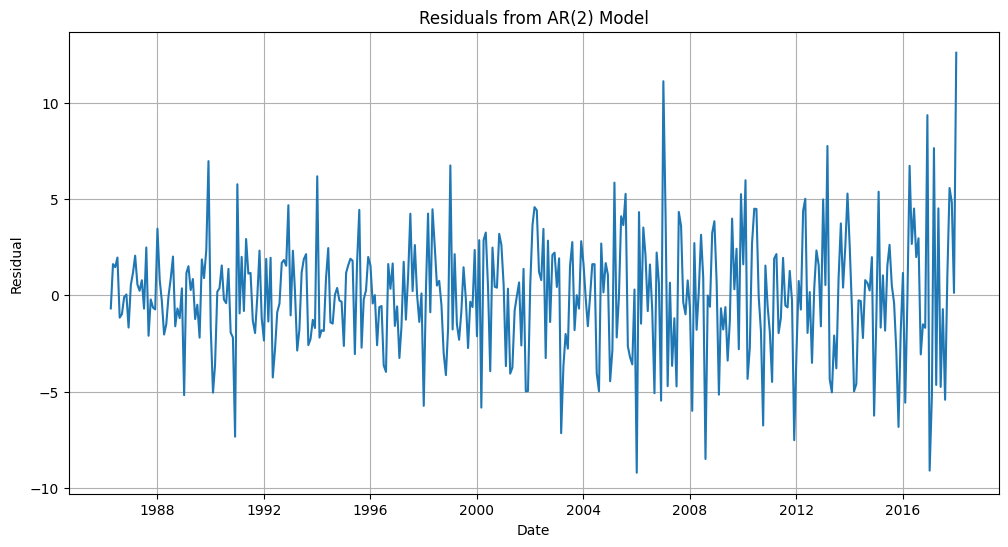

Ljung-Box test for autocorrelation in residuals:
      lb_stat  lb_pvalue
10  20.405364   0.025644


In [11]:
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from AR(2) Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test for autocorrelation in residuals:")
print(ljung_box_results)

Plot the residual ACF/PACF to check if residuals behave like white noise.

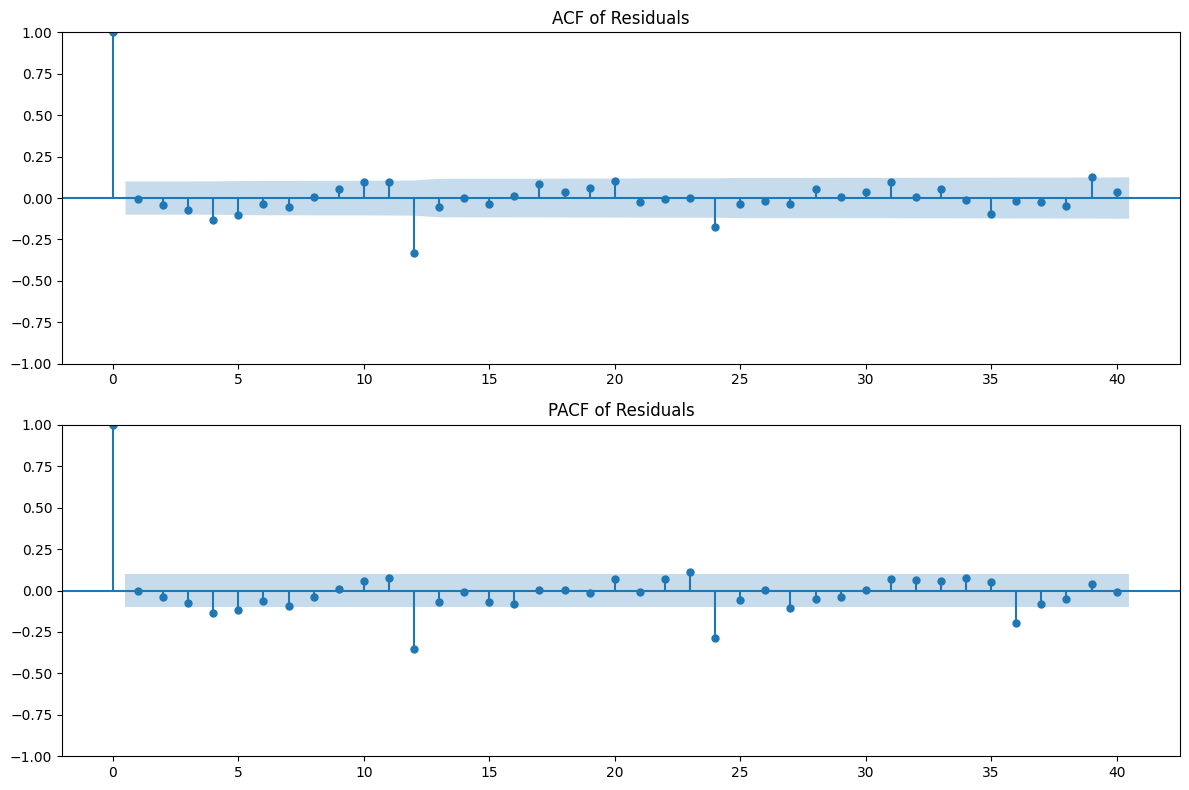

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax1, lags=40)
ax1.set_title('ACF of Residuals')
plot_pacf(residuals, ax=ax2, lags=40)
ax2.set_title('PACF of Residuals')
plt.tight_layout()
plt.show()